# Training of Siamese Networks

In [10]:
! pip install tensorflow==2.14.0

In [11]:
import numpy as np
import os
import pandas as pd
import tensorflow as tf

from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential

from Siamese_model import SiameseTrainer

from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [12]:
def create_pairs(x, digit_indices, num_classes):
    """Creates a balanced dataset of pairs for Siamese networks."""
    pairs = []
    labels = []

    # n: smallest number of instances among all classes in the dataset
    n = min([len(digit_indices[d]) for d in range(num_classes)]) - 1
    
    for d in range(num_classes):
        for i in range(n):
            z1, z2 = digit_indices[d][i], digit_indices[d][i + 1]
            pairs += [[x[z1], x[z2]]]
            inc = np.random.randint(1, num_classes)
            dn = (d + inc) % num_classes
            z1, z2 = digit_indices[d][i], digit_indices[dn][i]
            pairs += [[x[z1], x[z2]]]
            labels += [1, 0]
    return np.array(pairs), np.array(labels)

In [13]:
def train(self, x_train, y_train, x_val, y_val, batch_size=32, epochs=10):
    # Create digit_indices for training and validation sets
    digit_indices_train = [np.where(y_train == i)[0] for i in range(self.num_classes)]
    digit_indices_val = [np.where(y_val == i)[0] for i in range(self.num_classes)]

    # Create training pairs
    tr_pairs, tr_y = create_pairs(x_train, digit_indices_train, self.num_classes)

    # Create validation pairs
    val_pairs, val_y = create_pairs(x_val, digit_indices_val, self.num_classes)

    # Train the model
    self.history = self.model.fit([tr_pairs[:, 0], tr_pairs[:, 1]], tr_y,
                                  batch_size=batch_size,
                                  epochs=epochs,
                                  validation_data=([val_pairs[:, 0], val_pairs[:, 1]], val_y))


In [14]:
def load_and_preprocess_image(path, target_size=(96, 96)):
    img = load_img(path, target_size=target_size, color_mode='grayscale')
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0  # Normalize to [0,1]
    return img

# def load_pairs_and_labels(csv_path, image_base_path):
#     df = pd.read_csv(csv_path)
#     pairs = []
#     labels = df['label'].values
    
#     for idx, row in df.iterrows():
#         img1_path = os.path.join(image_base_path, row['image_1'])
#         img2_path = os.path.join(image_base_path, row['image_2'])
        
#         img1 = load_and_preprocess_image(img1_path)
#         img2 = load_and_preprocess_image(img2_path)
        
#         pairs.append([img1, img2])
    
#     pairs = np.array(pairs)
#     # Reshape to fit the Siamese network input
#     pairs = [pairs[:, 0].squeeze(), pairs[:, 1].squeeze()]
    
#     return pairs, labels

def load_pairs_and_labels(csv_path, image_base_path):
    df = pd.read_csv(csv_path)
    pair_images = []
    labels = df['label'].values
    
    for idx, row in df.iterrows():
        img1_path = os.path.join(image_base_path, row['image_1'])
        img2_path = os.path.join(image_base_path, row['image_2'])
        
        img1 = load_and_preprocess_image(img1_path)
        img2 = load_and_preprocess_image(img2_path)
        
        pair_images.append(np.concatenate([img1, img2], axis=0))
    
    # Convert list of pairs to a numpy array
    pairs = np.array(pair_images)
    
    # Since each image pair is concatenated along axis=0, we reshape to ensure
    # the final structure is compatible with what train_model expects
    pairs = pairs.reshape(-1, 2, *pairs.shape[2:])
    
    return pairs, labels


In [15]:
# Create a CNNModel object
def simple_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(1024, activation='relu'),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [16]:
input_shape = (96, 96, 1)
num_classes = 3
epochs = 10

train_path = os.getcwd() + "/Split_Siamese/train.csv"
validation_path = os.getcwd() + "/Split_Siamese/validation.csv"
test_path = os.getcwd() + "/Split_Siamese/test.csv"

image_dir = '../OpenSARShip/Categories/'

In [17]:
model = simple_cnn(input_shape, num_classes)

In [18]:
# Define paths
image_base_path = '../OpenSARShip/Categories/'
train_csv_path = os.getcwd() + "/Split_Siamese/train_pairs.csv"
val_csv_path = os.getcwd() + "/Split_Siamese/val_pairs.csv"
test_csv_path = os.getcwd() + "/Split_Siamese/test_pairs.csv"

# Load and preprocess the data
print("Loading and preprocessing the data train")
train_pairs, train_labels = load_pairs_and_labels(train_csv_path, image_base_path)
print("Loading and preprocessing the data val")
val_pairs, val_labels = load_pairs_and_labels(val_csv_path, image_base_path)
print("Loading and preprocessing the data test")
test_pairs, test_labels = load_pairs_and_labels(test_csv_path, image_base_path)



Loading and preprocessing the data train
Loading and preprocessing the data val
Loading and preprocessing the data test


In [19]:
# print(type(train_pairs), type(train_labels))
# print(train_pairs.shape, train_labels.shape)

Creating the SiameseTrainer
Compiling the model
Training the model
Epoch 1/30
1544/1544 [==============================] - ETA: 0s - loss: 0.6727 - accuracy: 0.6053
Epoch 1: val_accuracy improved from -inf to 0.54891, saving model to Siam_batch128.pth
INFO:tensorflow:Assets written to: Siam_batch128.pth\assets


INFO:tensorflow:Assets written to: Siam_batch128.pth\assets


1544/1544 [==============================] - 1256s 812ms/step - loss: 0.6727 - accuracy: 0.6053 - val_loss: 0.6900 - val_accuracy: 0.5489
Epoch 2/30
1544/1544 [==============================] - ETA: 0s - loss: 0.6625 - accuracy: 0.6321
Epoch 2: val_accuracy improved from 0.54891 to 0.55541, saving model to Siam_batch128.pth
INFO:tensorflow:Assets written to: Siam_batch128.pth\assets


INFO:tensorflow:Assets written to: Siam_batch128.pth\assets


1544/1544 [==============================] - 1234s 799ms/step - loss: 0.6625 - accuracy: 0.6321 - val_loss: 0.6898 - val_accuracy: 0.5554
Epoch 3/30
1544/1544 [==============================] - ETA: 0s - loss: 0.6617 - accuracy: 0.6226
Epoch 3: val_accuracy improved from 0.55541 to 0.55568, saving model to Siam_batch128.pth
INFO:tensorflow:Assets written to: Siam_batch128.pth\assets


INFO:tensorflow:Assets written to: Siam_batch128.pth\assets


1544/1544 [==============================] - 1215s 787ms/step - loss: 0.6617 - accuracy: 0.6226 - val_loss: 0.6918 - val_accuracy: 0.5557
Epoch 4/30
1544/1544 [==============================] - ETA: 0s - loss: 0.6611 - accuracy: 0.6132
Epoch 4: val_accuracy did not improve from 0.55568
1544/1544 [==============================] - 1212s 785ms/step - loss: 0.6611 - accuracy: 0.6132 - val_loss: 0.6936 - val_accuracy: 0.5523
Epoch 5/30
1544/1544 [==============================] - ETA: 0s - loss: 0.6608 - accuracy: 0.6071
Epoch 5: val_accuracy did not improve from 0.55568
1544/1544 [==============================] - 1213s 786ms/step - loss: 0.6608 - accuracy: 0.6071 - val_loss: 0.6948 - val_accuracy: 0.5494
Epoch 6/30
1544/1544 [==============================] - ETA: 0s - loss: 0.6605 - accuracy: 0.6090
Epoch 6: val_accuracy did not improve from 0.55568
1544/1544 [==============================] - 1213s 786ms/step - loss: 0.6605 - accuracy: 0.6090 - val_loss: 0.6955 - val_accuracy: 0.5536
E

INFO:tensorflow:Assets written to: Siam_batch128.pth\assets


1544/1544 [==============================] - 1205s 781ms/step - loss: 0.6598 - accuracy: 0.6292 - val_loss: 0.6886 - val_accuracy: 0.5568
Epoch 14/30
1544/1544 [==============================] - ETA: 0s - loss: 0.6596 - accuracy: 0.6279
Epoch 14: val_accuracy did not improve from 0.55680
1544/1544 [==============================] - 1202s 778ms/step - loss: 0.6596 - accuracy: 0.6279 - val_loss: 0.6927 - val_accuracy: 0.5522
Epoch 15/30
1544/1544 [==============================] - ETA: 0s - loss: 0.6596 - accuracy: 0.6304
Epoch 15: val_accuracy improved from 0.55680 to 0.55893, saving model to Siam_batch128.pth
INFO:tensorflow:Assets written to: Siam_batch128.pth\assets


INFO:tensorflow:Assets written to: Siam_batch128.pth\assets


1544/1544 [==============================] - 1205s 780ms/step - loss: 0.6596 - accuracy: 0.6304 - val_loss: 0.6883 - val_accuracy: 0.5589
Epoch 16/30
1544/1544 [==============================] - ETA: 0s - loss: 0.6595 - accuracy: 0.6314
Epoch 16: val_accuracy did not improve from 0.55893
1544/1544 [==============================] - 1194s 773ms/step - loss: 0.6595 - accuracy: 0.6314 - val_loss: 0.6915 - val_accuracy: 0.5572
Epoch 17/30
1544/1544 [==============================] - ETA: 0s - loss: 0.6595 - accuracy: 0.6309
Epoch 17: val_accuracy did not improve from 0.55893
1544/1544 [==============================] - 1198s 776ms/step - loss: 0.6595 - accuracy: 0.6309 - val_loss: 0.6905 - val_accuracy: 0.5563
Epoch 18/30
1544/1544 [==============================] - ETA: 0s - loss: 0.6594 - accuracy: 0.6353
Epoch 18: val_accuracy did not improve from 0.55893
1544/1544 [==============================] - 1203s 779ms/step - loss: 0.6594 - accuracy: 0.6353 - val_loss: 0.6952 - val_accuracy: 0.

INFO:tensorflow:Assets written to: Siam_batch128.pth\assets


1544/1544 [==============================] - 1192s 772ms/step - loss: 0.6593 - accuracy: 0.6369 - val_loss: 0.6866 - val_accuracy: 0.5610
Epoch 25/30
1544/1544 [==============================] - ETA: 0s - loss: 0.6591 - accuracy: 0.6351
Epoch 25: val_accuracy improved from 0.56105 to 0.56218, saving model to Siam_batch128.pth
INFO:tensorflow:Assets written to: Siam_batch128.pth\assets


INFO:tensorflow:Assets written to: Siam_batch128.pth\assets


1544/1544 [==============================] - 1198s 776ms/step - loss: 0.6591 - accuracy: 0.6351 - val_loss: 0.6867 - val_accuracy: 0.5622
Epoch 26/30
1544/1544 [==============================] - ETA: 0s - loss: 0.6592 - accuracy: 0.6380
Epoch 26: val_accuracy did not improve from 0.56218
1544/1544 [==============================] - 1194s 773ms/step - loss: 0.6592 - accuracy: 0.6380 - val_loss: 0.6875 - val_accuracy: 0.5595
Epoch 27/30
1544/1544 [==============================] - ETA: 0s - loss: 0.6592 - accuracy: 0.6322
Epoch 27: val_accuracy did not improve from 0.56218
1544/1544 [==============================] - 1193s 773ms/step - loss: 0.6592 - accuracy: 0.6322 - val_loss: 0.6913 - val_accuracy: 0.5559
Epoch 28/30
1544/1544 [==============================] - ETA: 0s - loss: 0.6592 - accuracy: 0.6349
Epoch 28: val_accuracy did not improve from 0.56218
1544/1544 [==============================] - 1194s 773ms/step - loss: 0.6592 - accuracy: 0.6349 - val_loss: 0.6977 - val_accuracy: 0.

INFO:tensorflow:Assets written to: Siam_batch128.pth\assets


New best model with validation accuracy 0.552832305431366 saved as Siam_batch128.pth
Plotting the training history


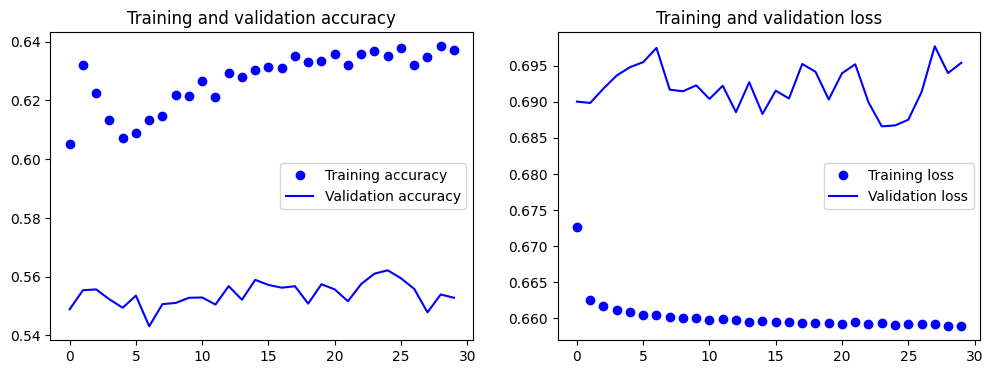

Evaluating the model
686/686 [==============================] - 36s 52ms/step - loss: 0.6931 - accuracy: 0.5644
Test accuracy:  0.5644110441207886


In [21]:
# Assuming `simple_cnn` and `SiameseTrainer` are defined as before
print("Creating the SiameseTrainer")
siamese_network = SiameseTrainer(base_model_func=simple_cnn, input_shape=(96, 96, 1), num_classes=num_classes)

# Compile the model
print("Compiling the model")
siamese_network.compile_model(optimizer='adam', loss='binary_crossentropy')

# Train the model
print("Training the model")
# siamese_network.train_model(train_pairs, train_labels, val_pairs, val_labels, epochs=10, batch_size=32)
siamese_network.train_model(train_pairs, train_labels, val_pairs, val_labels, epochs=30, batch_size=128, model_save_name='Siam_batch128.pth')


# Plot training history
print("Plotting the training history")
siamese_network.plot_training()

# Evaluate the model
print("Evaluating the model")
siamese_network.evaluate_model(test_pairs, test_labels)


In [ ]:
# # Assuming you have defined `simple_cnn` as before and have loaded your dataset
# siamese_network = SiameseTrainer(base_model_func=simple_cnn, input_shape=input_shape, num_classes=num_classes)

# # Compile the model with the desired optimizer, loss, and metrics
# siamese_network.compile_model(optimizer='adam', loss='binary_crossentropy')

# # Train the model
# siamese_network.train(x_train, y_train, x_val, y_val, batch_size=32, epochs=10)

# # Plot training history
# siamese_network.plot_training_history()

# # Optionally, evaluate the model on a test set prepared in a similar way
# # siamese_network.evaluate_model(x_test, y_test)
